# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
# Eliminates every data with target = 2 so we can have only two classes
X = iris.data[iris.target!=2,0:2]
y = iris.target[iris.target!=2]

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

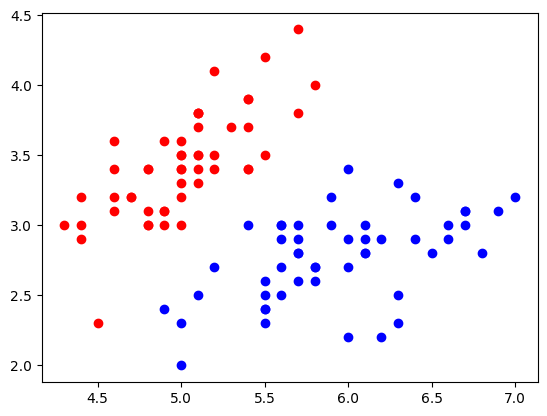

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.scatter(X[y==2,0],X[y==2,1],color='green')


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:
from sklearn.svm import SVC
#Split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

#Train with C parameter 200
SVMmodel=SVC(kernel='linear',C=200)
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

(80, 2)
(20, 2)


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x1 x2] + b = 0:

Coeficient:
[[ 6.28430986 -5.14210636]]
Intercept:
[-17.45220171]


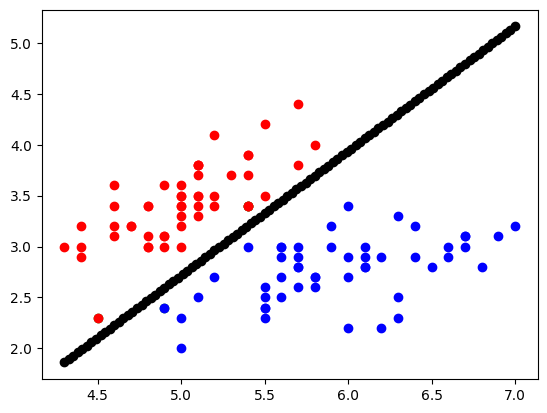

In [ ]:
import numpy as np


supvectors=SVMmodel.support_vectors_

# Plot of the support vectors
plt.scatter(supvectors[:,0],supvectors[:,1],color='green')

#Plot of the decision line
# W = ax+b = 0
#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print("Coeficient:")
print(W)
print("Intercept:")
print(b)
x1 = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2 = -(W[0][0]*x1+b[0])/W[0][1]
plt.scatter(x1,x2, color='black')

# Plot of the data
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

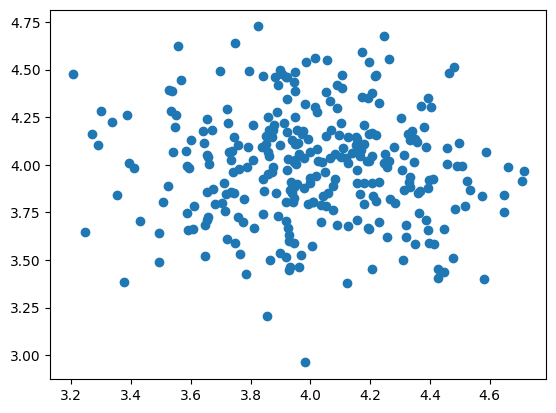

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

(240, 2)
(60, 2)


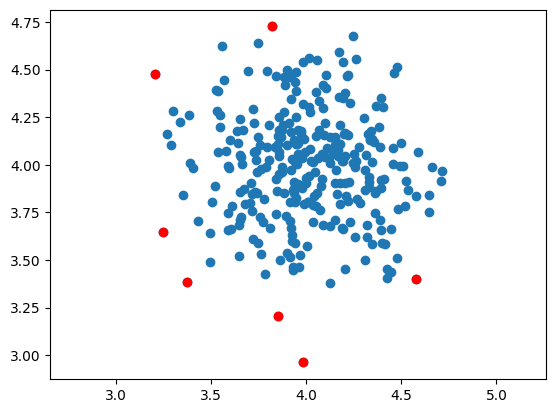

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
x_train, x_test = train_test_split(x,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

SVMmodelOne.fit(x)
SVMmodelOne.get_params()
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

Plot the support vectors:

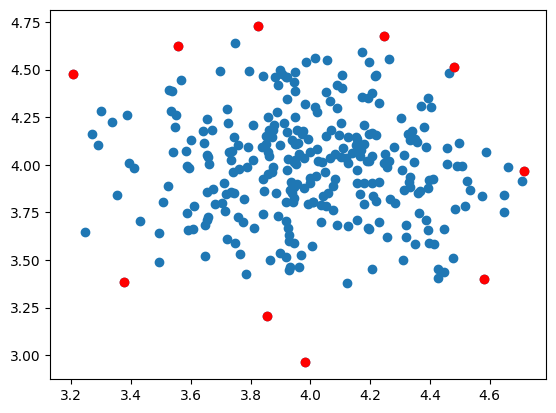

In [ ]:
supvectors=SVMmodelOne.support_vectors_

# Plot of the support vectors
plt.scatter(x[:,0], x[:,1])
plt.scatter(supvectors[:,0],supvectors[:,1],color='red')




What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.990230609448586


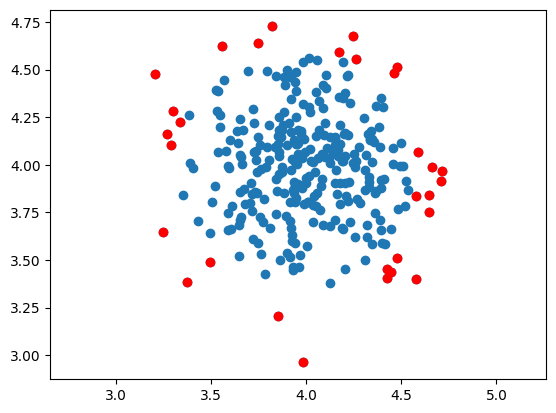

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.1)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()